<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/FNO_Above_50_DMA_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
START = "2015-01-01"  #yyyy-mm-dd
#END = end_date
lst= []

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=6fbd81acb12a516f282581f5de0eea4fae6ac5982a597eeb9308934b65fdbd53
  Stored in directory: /tmp/pip-ephem-wheel-cache-ojj8ua7u/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#@title Ticker
fno= ['IDEA.ns',
 'IRCTC.ns',
 'NAM-INDIA.ns',
 'NATIONALUM.ns',
 'GLENMARK.ns',
 'UBL.ns',
 'IBULHSGFIN.ns',
 'HAVELLS.ns',
 'DIVISLAB.ns',
 'NMDC.ns',
 'GRANULES.ns',
 'MCDOWELL-N.ns',
 'BHARTIARTL.ns',
 'PEL.ns',
 'BALKRISIND.ns',
 'BATAINDIA.ns',
 'INDUSTOWER.ns',
 'DLF.ns',
 'JINDALSTEL.ns',
 'INDHOTEL.ns',
 'ULTRACEMCO.ns',
 'AUROPHARMA.ns',
 'BHEL.ns',
 'TATASTEEL.ns',
 'BIOCON.ns',
 'LUPIN.ns',
 'POWERGRID.ns',
 'PFC.ns',
 'RELIANCE.ns',
 'SRF.ns',
 'IDFCFIRSTB.ns',
 'GODREJPROP.ns',
 'NAVINFLUOR.ns',
 'VEDL.ns',
 'RAMCOCEM.ns',
 'JUBLFOOD.ns',
 'HINDALCO.ns',
 'PNB.ns',
 'ACC.ns',
 'MRF.ns',
 'SAIL.ns',
 'GRASIM.ns',
 'SUNPHARMA.ns',
 'ITC.ns',
 'METROPOLIS.ns',
 'ICICIPRULI.ns',
 'VOLTAS.ns',
 'HDFCLIFE.ns',
 'CADILAHC.ns',
 'APOLLOHOSP.ns',
 'EXIDEIND.ns',
 'M&MFIN.ns',
 'ALKEM.ns',
 'MFSL.ns',
 'HEROMOTOCO.ns',
 'MOTHERSUMI.ns',
 'APLLTD.ns',
 'RECLTD.ns',
 'LT.ns',
 'HINDPETRO.ns',
 'GUJGASLTD.ns',
 'PETRONET.ns',
 'BPCL.ns',
 'JSWSTEEL.ns',
 'DEEPAKNTR.ns',
 'SUNTV.ns',
 'MPHASIS.ns',
 'AARTIIND.ns',
 'CANBK.ns',
 'PIIND.ns',
 'BERGEPAINT.ns',
 'GODREJCP.ns',
 'PFIZER.ns',
 'TATACHEM.ns',
 'GAIL.ns',
 'CUB.ns',
 'TATAMOTORS.ns',
 'TVSMOTOR.ns',
 'HINDUNILVR.ns',
 'DRREDDY.ns',
 'ASIANPAINT.ns',
 'WIPRO.ns',
 'CIPLA.ns',
 'MINDTREE.ns',
 'HDFCBANK.ns',
 'M&M.ns',
 'BEL.ns',
 'PAGEIND.ns',
 'PVR.ns',
 'GMRINFRA.ns',
 'BAJFINANCE.ns',
 'UPL.ns',
 'TORNTPOWER.ns',
 'NESTLEIND.ns',
 'HDFC.ns',
 'IOC.ns',
 'RBLBANK.ns',
 'MARUTI.ns',
 'BAJAJ-AUTO.ns',
 'TATAPOWER.ns',
 'KOTAKBANK.ns',
 'MUTHOOTFIN.ns',
 'APOLLOTYRE.ns',
 'CHOLAFIN.ns',
 'SBIN.ns',
 'TCS.ns',
 'PIDILITIND.ns',
 'COLPAL.ns',
 'SBILIFE.ns',
 'BHARATFORG.ns',
 'ONGC.ns',
 'BOSCHLTD.ns',
 'TITAN.ns',
 'LALPATHLAB.ns',
 'AXISBANK.ns',
 'LICHSGFIN.ns',
 'TORNTPHARM.ns',
 'ZEEL.ns',
 'L&TFH.ns',
 'DABUR.ns',
 'BRITANNIA.ns',
 'ABFRL.ns',
 'AMBUJACEM.ns',
 'ESCORTS.ns',
 'COALINDIA.ns',
 'AMARAJABAT.ns',
 'HDFCAMC.ns',
 'FEDERALBNK.ns',
 'ASHOKLEY.ns',
 'NTPC.ns',
 'SRTRANSFIN.ns',
 'INDIGO.ns',
 'TECHM.ns',
 'COFORGE.ns',
 'ADANIENT.ns',
 'MANAPPURAM.ns',
 'MGL.ns',
 'ICICIBANK.ns',
 'SIEMENS.ns',
 'CONCOR.ns',
 'INDUSINDBK.ns',
 'SHREECEM.ns',
 'TATACONSUM.ns',
 'MARICO.ns',
 'IGL.ns',
 'ADANIPORTS.ns',
 'BAJAJFINSV.ns',
 'INFY.ns',
 'COROMANDEL.ns',
 'CUMMINSIND.ns',
 'AUBANK.ns',
 'ICICIGI.ns',
 'NAUKRI.ns',
 'EICHERMOT.ns',
 'LTTS.ns',
 'BANKBARODA.ns',
 'TRENT.ns',
 'LTI.ns',
 'BANDHANBNK.ns',
 'HCLTECH.ns']


In [4]:
nifty =yf.download('^NSEI', start=START)
nifty['pct_chg']=nifty['Close'].pct_change(7)

[*********************100%***********************]  1 of 1 completed


# Download From Quandl

In [5]:
import seaborn as sns

In [6]:
#@title #####download
for i in range(len(fno)):
  dfi = yf.download(fno[i], start=START)
  
  dfi = dfi.dropna()
 
  lst.append(dfi)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
fno_database=lst.copy()

In [8]:
#@title #####draw plot code
def draw_plot(labels,df,nifty):
  line=round(len(df.iloc[0])/2)
  fig, ax = plt.subplots(4,1, figsize=(15,9),sharex=True)
  ax[0].plot(df.loc[:, :].index, df.loc[:, 'sum'], label=labels)
  ax[2].plot(nifty.loc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
  #ax[2].scatter(nifty.iloc[buy].index,nifty.iloc[buy].Close,marker='^',label='Buy',color='g')
  #ax[2].scatter(nifty.iloc[sell].index,nifty.iloc[sell].Close,marker='v',label='Sell',color='r')
  ax[2].plot(nifty['Close'].ewm(span=50,adjust=False).mean())
  ax[0].plot(df['sum'].ewm(span=50, adjust=False).mean(),linewidth=2, markersize=4 ,label='50EMA' ,color='r')
  ax[0].plot(df['sum'].ewm(span=20, adjust=False).mean(),linewidth=1, markersize=4 ,label='20EMA' ,color='g')
  ax[1].plot(df['macd'],label='MACD100')
  ax[1].plot(df['signal'],label='Signal100')
  ax[3].plot(df['macd20'],label='MACD50')
  ax[3].plot(df['signal20'],label='Signal50')
  #ax[2].scatter(nifty.iloc[buy20].index,nifty.iloc[buy20].Close,marker='*',label='Buy',color='g')
  #ax[2].scatter(nifty.iloc[sell20].index,nifty.iloc[sell20].Close,marker='*',label='Sell',color='r')
  #ax[1].hist(df['hist'],label='Histogram')
  ax[0].legend(loc='upper left')
  ax[0].set_ylabel(labels)
  ax[1].legend('MACD')
  ax[1].legend(loc='upper left')
  ax[2].legend('Nifty')
  ax[0].axhline(y=line , color ='r')
  yloc = YearLocator()
  mloc = MonthLocator()
  ax[0].xaxis.set_major_locator(mloc)
  ax[1].xaxis.set_major_locator(mloc)
  ax[2].xaxis.set_major_locator(mloc)
  ax[3].xaxis.set_major_locator(mloc)
  ax[0].grid(linewidth =2)
  ax[1].grid(linewidth =2)
  ax[2].grid(linewidth =2)
  ax[3].grid(linewidth =2)
  ax[0].legend()
  ax[2].legend()
  ax[1].legend()
  ax[3].legend()
  ax[1].axhline(y=0 , color='r')
  fig.suptitle(labels)
  plt.show()

In [9]:
#@title #####get indicators code
def get_indicators(ema,lst=lst):
  dlix=[]
  for i in range(len(lst)):
    dlix.append(lst[i].Close)

  df = pd.DataFrame(dlix).T
  namelist =[]
  for i in range(1,len(lst)+1):
    namelist.append('Close'+str(i))
  df.columns = namelist

  for name in namelist:
    name=str(name)
    var = name+'ema_'+str(ema)
    
    df[var] = df[name].ewm(span=ema, adjust=False).mean()
  lst_N = []
  for name in namelist:
    name=str(name)
    varname = name+'ema_'+str(ema)
  
    lst_N.append((df[varname].diff() > 0 ).astype(int))
  df2 = pd.DataFrame(lst_N).T
  df2['sum']=df2.sum(axis=1)
  df2['macd']=df2['sum'].ewm(span=50, adjust=False).mean()-df2['sum'].ewm(span=100, adjust=False).mean()
  df2['signal']=df2['macd'].ewm(span=35,adjust=False).mean()
  df2['hist']=df2['macd']-df2['signal']
  df2['macd20']=df2['sum'].ewm(span=20, adjust=False).mean()-df2['sum'].ewm(span=50, adjust=False).mean()
  df2['signal20']=df2['macd20'].ewm(span=15,adjust=False).mean()
  df2['hist20']=df2['macd20']-df2['signal20']
  return df2

In [10]:
#@title ######get buy sell signals
def plot_buy_sell_signal(df):
  buy=[]
  sell=[]
  buy20=[]
  sell20=[]
  for i in range(len(df)):
    if df.macd.iloc[i]>df.signal.iloc[i] and df.macd.iloc[i-1]<df.signal.iloc[i-1] :
      buy.append(i)
    elif df.macd.iloc[i]<df.signal.iloc[i] and df.macd.iloc[i-1]>df.signal.iloc[i-1]:
      sell.append(i)
    if df.macd20.iloc[i]>df.signal20.iloc[i] and df.macd20.iloc[i-1]<df.signal20.iloc[i-1] :
      buy20.append(i)
    elif df.macd20.iloc[i]<df.signal20.iloc[i] and df.macd20.iloc[i-1]>df.signal20.iloc[i-1]:
      sell20.append(i)
  return buy ,sell , buy20,sell20

In [11]:
#@title #####start time
import datetime
start_date = '2016-01-01'
end_date = str(datetime.datetime.today()).split()[0]
#datetime.date.today()
end_date

'2021-08-26'

#Nifty FNO above 20 dma

In [12]:
df=get_indicators(20)  #50,20,15
df=df.dropna()

In [13]:
 buy,sell,buy20,sell20=plot_buy_sell_signal(df)

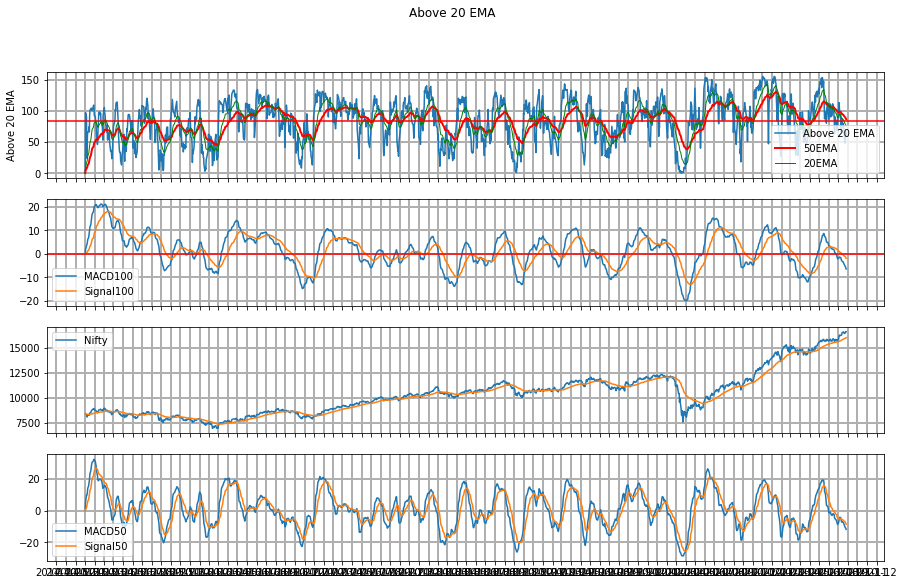

In [14]:
draw_plot('Above 20 EMA',df,nifty)

#Nifty FnO above 50 dma

In [15]:
df=get_indicators(50)  #50,20,15
df=df.dropna()

In [16]:
 buy,sell,buy20,sell20=plot_buy_sell_signal(df)

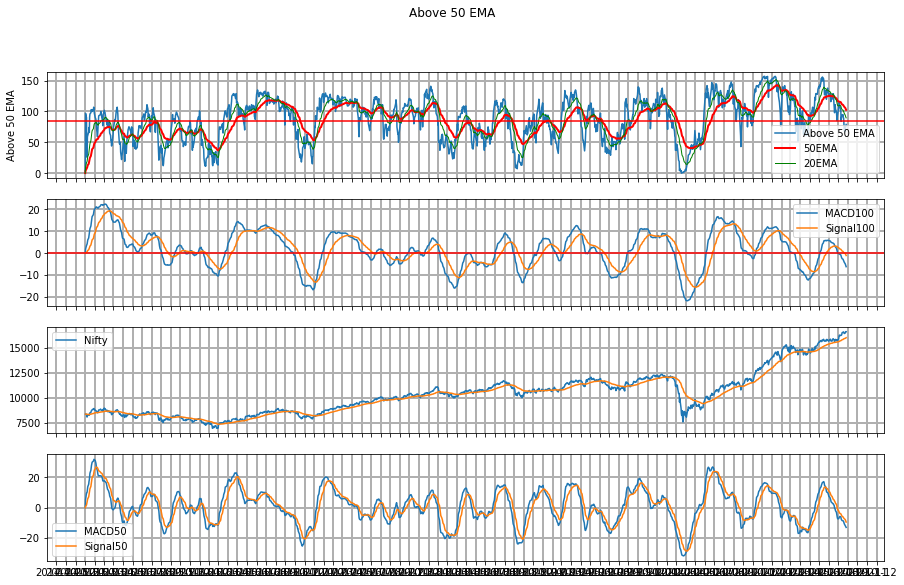

In [17]:
draw_plot('Above 50 EMA',df,nifty)

#Nifty FnO above 200 dma

In [18]:
textstr='Buy Signal Below 0 line of MACD invariably Works'

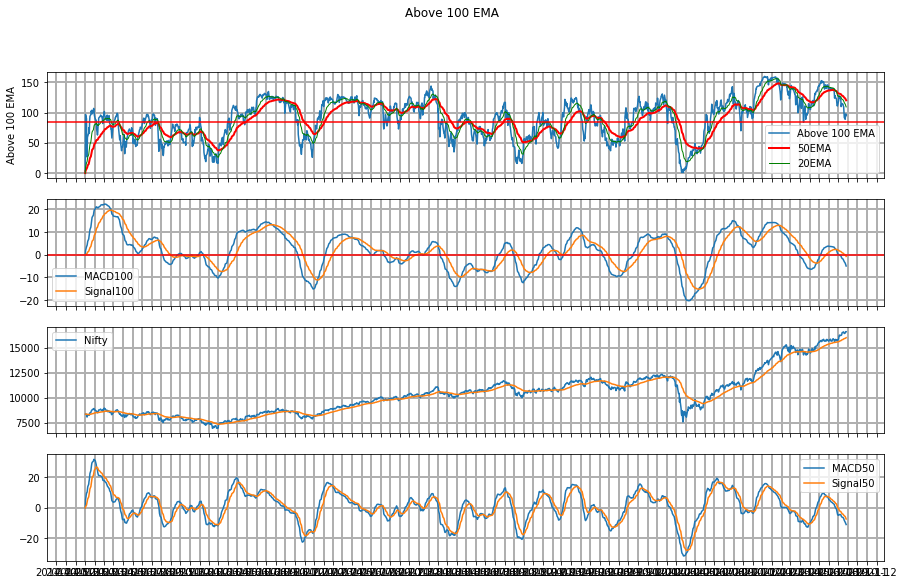

In [19]:
df=get_indicators(100)
buy,sell,buy20,sell20=plot_buy_sell_signal(df)
draw_plot('Above 100 EMA',df,nifty)


In [20]:

sample= nifty.join(df , how='inner',rsuffix='right')

In [21]:
sample['sum_diff']=sample['sum'].diff(7)


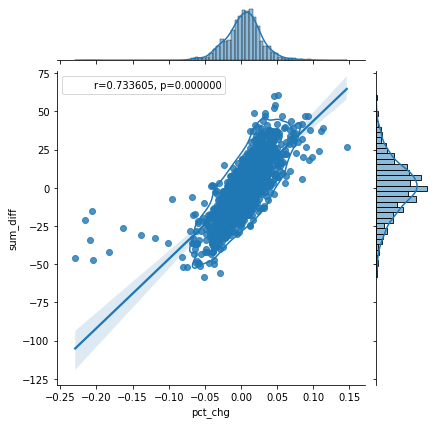

In [22]:
from scipy.stats import pearsonr
g=sns.jointplot(x='pct_chg',y='sum_diff',data=sample,kind='reg').plot_joint(sns.kdeplot,n_levels=6)
r, p = pearsonr(sample['pct_chg'][-800:], sample['sum_diff'][-800:])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

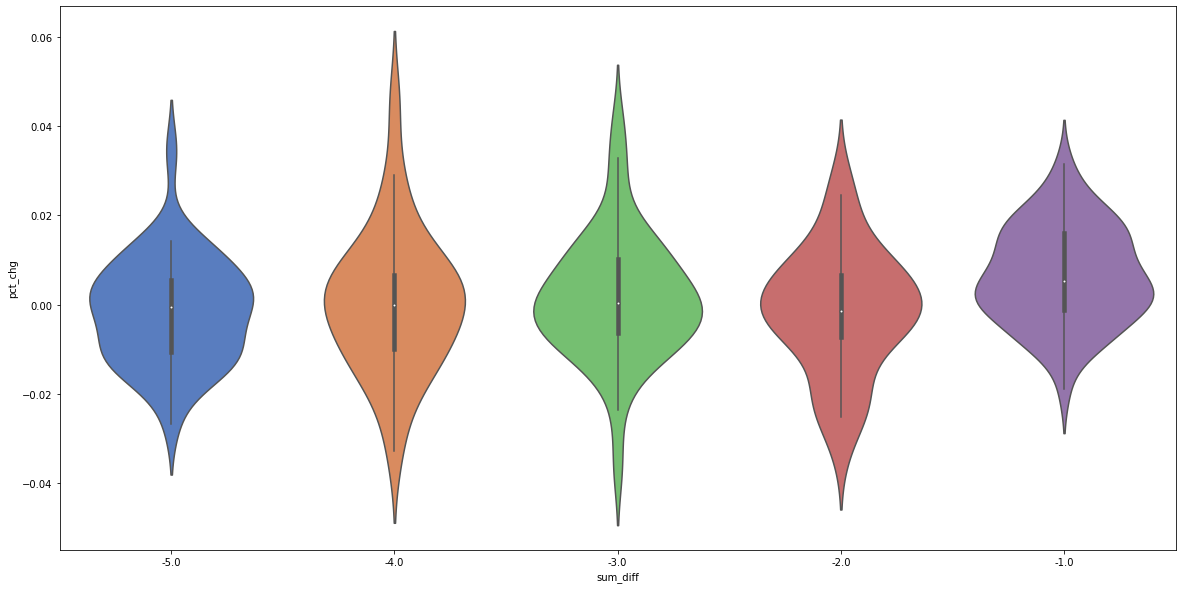

In [23]:
plt.figure(figsize=(20,10))
sns.violinplot(x='sum_diff',y='pct_chg',data=sample[(sample['sum_diff'] >= -5) & (sample['sum_diff'] <= -1)], palette="muted") # 
plt.show()

# LIX 15 STRENGTH

In [24]:
lix15 =['ADANIPORTS.NS','AXISBANK.NS','BAJFINANCE.NS','BHARTIARTL.NS','HDFCBANK.NS','INDUSINDBK.NS','IOC.NS','MARUTI.NS','ONGC.NS','POWERGRID.NS','RELIANCE.NS','SBIN.NS','SUNPHARMA.NS','TATASTEEL.NS','ULTRACEMCO.NS',]

lix=[]
for i in range(15):
  lxi = yf.download(lix15[i], start=START)
  
  lxi = lxi.dropna()
  
  lix.append(lxi)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [25]:
lix_database=lix.copy()

In [26]:
lix=get_indicators(50,lix)  #50,20,15
lix=lix.dropna()

In [27]:
buy,sell,buy20,sell20=plot_buy_sell_signal(lix)


In [28]:
lix[['macd','signal']].iloc[872]

macd      0.002570
signal   -0.071295
Name: 2018-07-12 00:00:00, dtype: float64

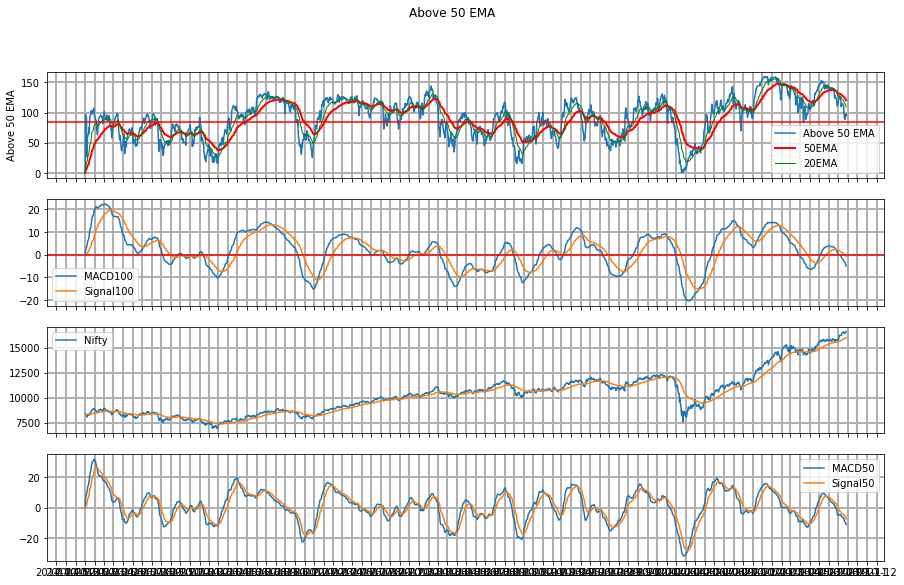

In [29]:
draw_plot('Above 50 EMA',df,nifty)

In [30]:
df.tail(2)

,Close1ema_100,Close2ema_100,Close3ema_100,Close4ema_100,Close5ema_100,Close6ema_100,Close7ema_100,Close8ema_100,Close9ema_100,Close10ema_100,Close11ema_100,Close12ema_100,Close13ema_100,Close14ema_100,Close15ema_100,Close16ema_100,Close17ema_100,Close18ema_100,Close19ema_100,Close20ema_100,Close21ema_100,Close22ema_100,Close23ema_100,Close24ema_100,Close25ema_100,Close26ema_100,Close27ema_100,Close28ema_100,Close29ema_100,Close30ema_100,Close31ema_100,Close32ema_100,Close33ema_100,Close34ema_100,Close35ema_100,Close36ema_100,Close37ema_100,Close38ema_100,Close39ema_100,Close40ema_100,...,Close128ema_100,Close129ema_100,Close130ema_100,Close131ema_100,Close132ema_100,Close133ema_100,Close134ema_100,Close135ema_100,Close136ema_100,Close137ema_100,Close138ema_100,Close139ema_100,Close140ema_100,Close141ema_100,Close142ema_100,Close143ema_100,Close144ema_100,Close145ema_100,Close146ema_100,Close147ema_100,Close148ema_100,Close149ema_100,Close150ema_100,Close151ema_100,Close152ema_100,Close153ema_100,Close154ema_100,Close155ema_100,Close156ema_100,Close157ema_100,Close158ema_100,Close159ema_100,Close160ema_100,sum,macd,signal,hist,macd20,signal20,hist20
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-25,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0,...,0,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1,0,1,98,-4.518377,-0.456712,-4.061664,-10.420498,-6.766400,-3.654098
2021-08-26,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,1,1,1,0,1,1,0,1,0,...,0,0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1,0,1,95,-4.942600,-0.705928,-4.236672,-10.910450,-7.284406,-3.626044


In [31]:
#@title #####get indicators code
def get_NHNL_indicators(lst=lst,high='high'):
  dlix=[]
  for i in range(len(lst)):
    dlix.append(lst[i].Close)

  df = pd.DataFrame(dlix).T
  namelist =[]
  for i in range(1,len(lst)+1):
    namelist.append('Close'+str(i))
  df.columns = namelist

  for name in namelist:
    name=str(name)
    
    var = name+'NH'
    var1= name+'NL'
    if high=='high':
      df[var] = df[name].rolling(window =20).max()
    if high=='low':
      df[var1] = df[name].rolling(window =20).min()  
    #print(df.tail(3))

  
  return df

In [32]:
def high_indicator(high,lst=lst):
  d=get_NHNL_indicators(lst=lst,high='high')
  len(d.iloc[0])//2
  cls=[]
  nhnl=[]
  for i in range(1,len(d.iloc[0])//2+1):
    var='Close'+str(i)
    cls.append(var)
    var_nhnl='Close'+str(i)+'NH'
    nhnl.append(var_nhnl)
    d=d.dropna()

  wantedcol=[]
  for i,j in zip(cls,nhnl):
    variable=str(i)+'newhigh'
    wantedcol.append(variable)
    #print(f'***********Close : {d[i]} , ********New High : {d[j]} , ************diff d[j]-d[i] : {d[i]-d[j]}')
    d[variable]=d[j]-d[i]
  x=d[wantedcol] 
  x[x > 0] = -1 
  x[x==0]=1
  x[x==-1]=0
  output = x.sum(axis=1)
  output=pd.DataFrame(output)
  output.columns=['NH']
  return output

In [33]:
def low_indicator(high,lst=lst):
  d=get_NHNL_indicators(lst=lst,high='low')
  len(d.iloc[0])//2
  cls=[]
  nhnl=[]
  for i in range(1,len(d.iloc[0])//2+1):
    var='Close'+str(i)
    cls.append(var)
    var_nhnl='Close'+str(i)+'NL'
    nhnl.append(var_nhnl)
    d=d.dropna()

  wantedcol=[]
  for i,j in zip(cls,nhnl):
    variable=str(i)+'newlow'
    wantedcol.append(variable)
    #print(f'***********Close : {d[i]} , ********New low : {d[j]} , ************diff d[j]-d[i] : {d[i]-d[j]}')
    d[variable]=d[i]-d[j]
  x=d[wantedcol]
  #print(x.tail(10)) 
  x[x > 0] = -1 
  x[x==0]=1
  x[x==-1]=0
  
  output = x.sum(axis=1)
  output=pd.DataFrame(output)
  output.columns=['NL']
  return output

In [34]:
high='high'
output=high_indicator(high,lix_database) #lix_database

In [35]:
high='low'
downput=low_indicator(high,lix_database)

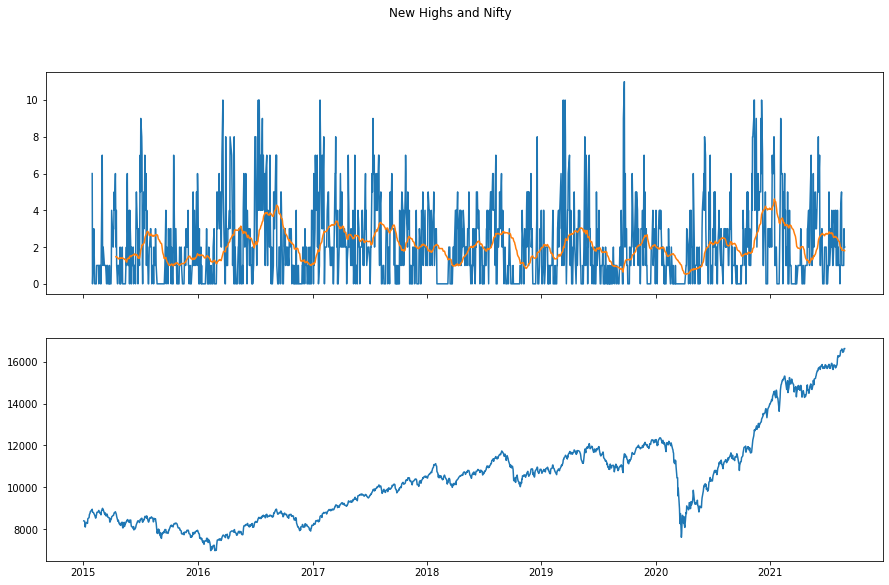

In [36]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(output.loc[:, :].index, output.loc[:, 'NH'], label='NH')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=50).mean(), label='NHmoving avg')

ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('New Highs and Nifty')
plt.show()

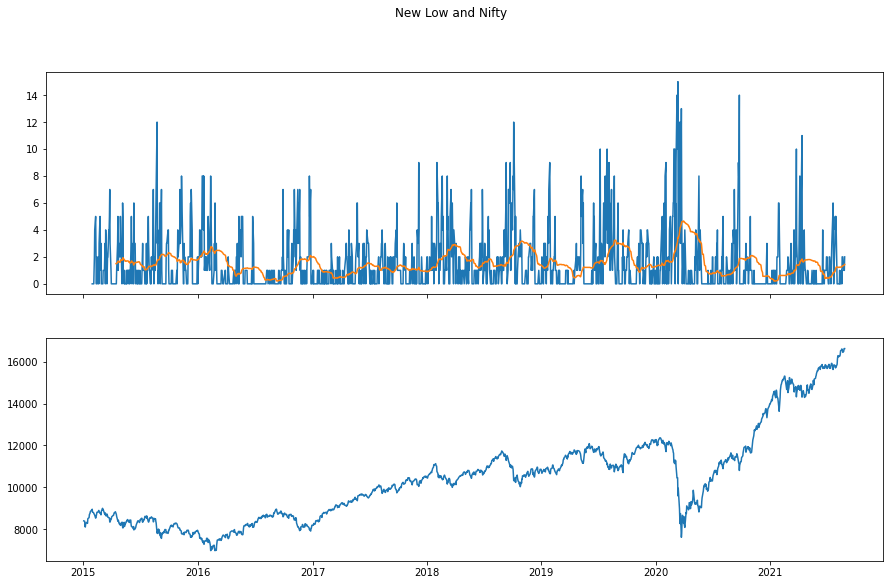

In [37]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(downput.loc[:, :].index, downput.loc[:, 'NL'], label='NL')
ax[0].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=50).mean(), label='NLmoving avg')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('New Low and Nifty')
plt.show()

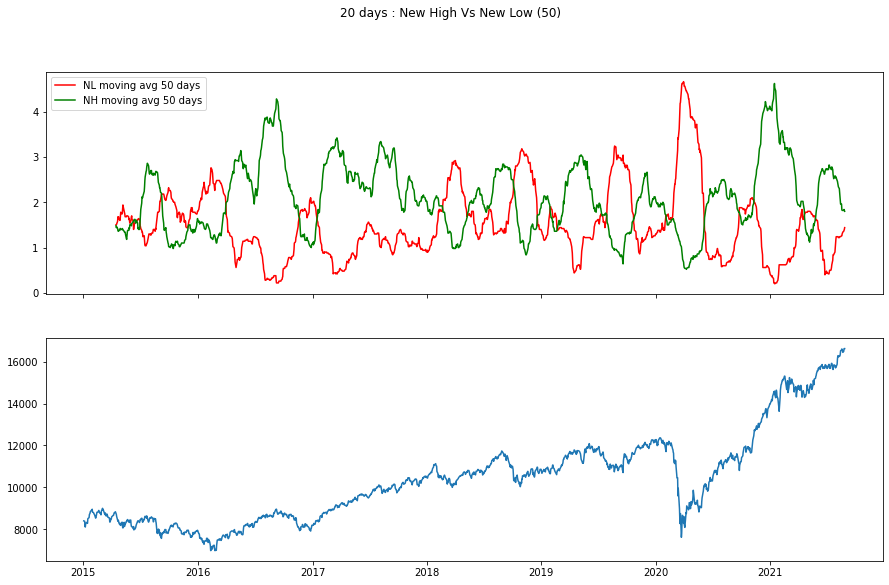

In [38]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=50).mean(),'r', label='NL moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=50).mean(),'g', label='NH moving avg 50 days')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('20 days : New High Vs New Low (50)')
ax[0].legend()
plt.show()

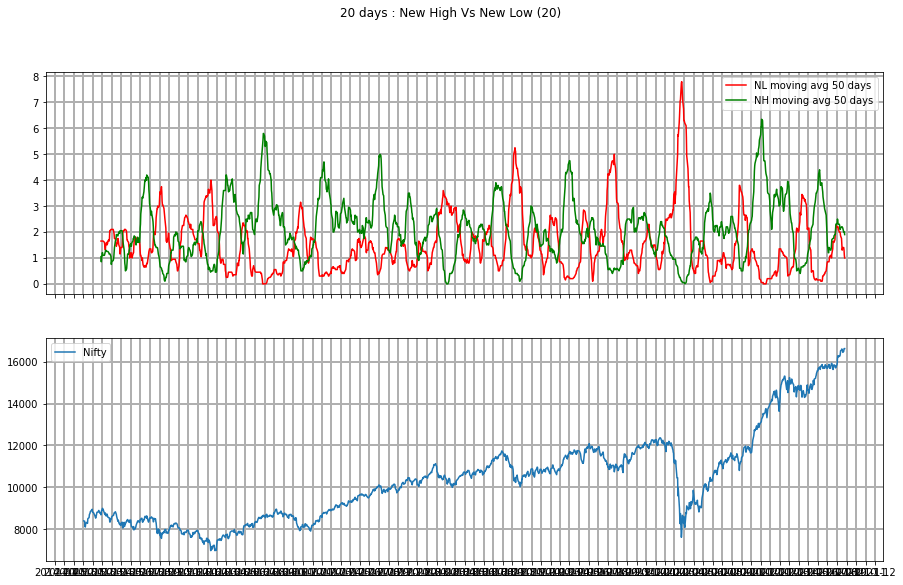

In [39]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=20).mean(),'r', label='NL moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=20).mean(),'g', label='NH moving avg 50 days')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('20 days : New High Vs New Low (20)')
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)
ax[0].legend()
#ax[2].legend()
ax[1].legend()
ax[0].legend()
plt.show()

In [40]:
downput['avg']= downput.loc[:, 'NL'].rolling(window=50).mean()
output['avg'] = output.loc[:, 'NH'].rolling(window=50).mean()
output['final']=output['avg']-downput['avg']

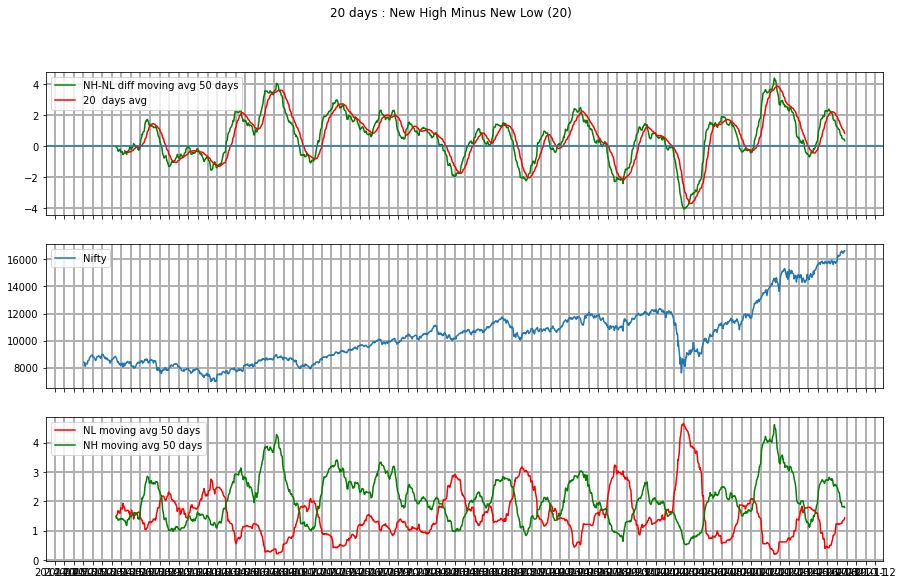

In [41]:
fig, ax = plt.subplots(3,1, figsize=(15,9),sharex=True)
ax[2].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=50).mean(),'r', label='NL moving avg 50 days')
ax[2].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=50).mean(),'g', label='NH moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'final'],'g', label='NH-NL diff moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'final'].rolling(window=20).mean(),'r', label='20  days avg')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('20 days : New High Minus New Low (20)')
ax[0].legend()
ax[2].legend()
ax[1].legend()
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
ax[2].grid(linewidth =2)
ax[0].legend()
ax[2].legend()
ax[1].legend()
ax[0].axhline(y=0)
plt.show()